##Conect to Google Drive

In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


##Code

In [2]:
import tensorflow as tf

import os
import pathlib
import time
import datetime

from matplotlib import pyplot as plt
from IPython import display

#Change directory
%cd /content/gdrive/MyDrive/pix2pix_turtle_v2

generator = tf.keras.models.load_model('./training_checkpoints/generator_model')

/content/gdrive/MyDrive/pix2pix_turtle_v2


#ตั้งตำแหน่งโฟลเดอร์ที่จะเซฟรูป

In [3]:
#ตั้งตำแหน่งโฟลเดอร์
%cd /content/gdrive/MyDrive/dataset/Animation/NewEdition/OtherAnimals/

/content/gdrive/MyDrive/dataset/Animation/NewEdition/OtherAnimals


#อัพโหลดรูป

In [4]:
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

#อัพโหลดไฟล์
file = upload_files()

Saving dino1.png to dino1.png
Saving dog1.png to dog1.png
Saving rabbit1.png to rabbit1.png


#สร้างรูปเต่า

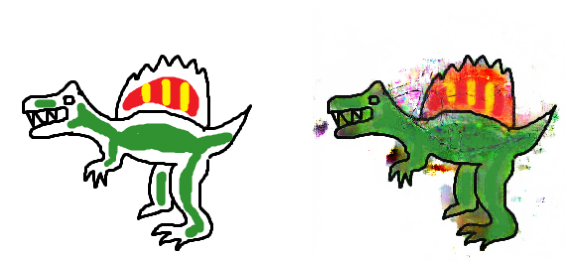

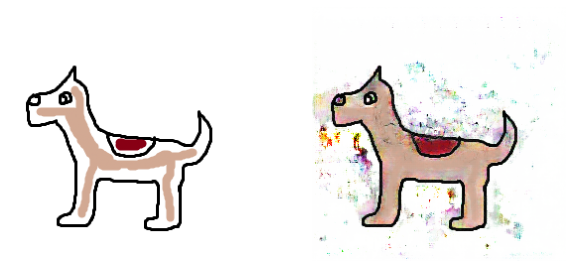

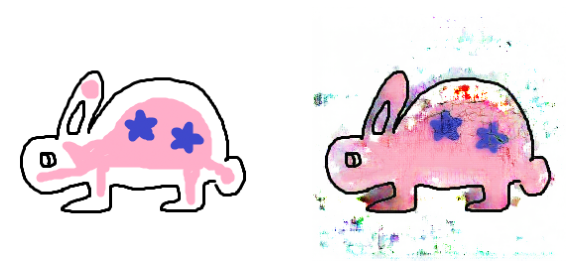

In [5]:
from PIL import Image
import numpy as np
import os
from os.path import isfile, join

# Normalizing the images to [-1, 1]
def normalize(input_image, real_image):
  input_image = (input_image / 127.5) - 1
  real_image = (real_image / 127.5) - 1

  return input_image, real_image

frame_array = []
files = [f for f in os.listdir('./') if isfile(join('./', f))]
#for sorting the file names properly
#files.sort(key = lambda x: int(x[5:-4]))
for i in range(len(files)):
    filename= files[i]
    #reading each files
    im = Image.open(filename)
    im1 = np.array(im)
    im2, _ = normalize(im1, im1)
    im3 = np.expand_dims(im2, axis=0)
    prediction = generator(im3, training=True)
    #inserting the frames into an image array
    frame_array.append(prediction[0])
    display_list = [im3[0], prediction[0]]
    title = ['Input Image', 'Predicted Image']
    plt.figure(figsize=(10, 5))
    for i in range(2):
        plt.subplot(1, 2, i+1)
        #plt.title(title[i])
        # Getting the pixel values in the [0, 1] range to plot.
        plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis('off')
    plt.show()

#เซฟรูปเต่า

In [ ]:
#save รูปเต่า
output_path = './Result/'
n = 1
#Make folder if folder doesn't exist
if not os.path.exists(output_path):
    os.makedirs(output_path)
for frame in frame_array:
  img_save = tf.keras.preprocessing.image.save_img(output_path + str(n) + '.jpg', frame)
  n = n+1

#สร้างวิดิโอ

In [ ]:
import cv2
import numpy as np
import os
from os.path import isfile, join
def convert_frames_to_video(pathIn,pathOut,fps):
    frame_array = []
    files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
    #for sorting the file names properly
    #files.sort(key = lambda x: int(x[5:-4]))
    for _ in range(60//fps + 1):
      for i in range(len(files)):
          filename=pathIn + files[i]
          #reading each files
          img = cv2.imread(filename)
          height, width, layers = img.shape
          size = (width,height)
          print(filename)
          #inserting the frames into an image array
          frame_array.append(img)
    out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
    for i in range(len(frame_array)):
        # writing to a image array
        out.write(frame_array[i])
    out.release()

pathIn= './Result/'
dirOut = './Video/'
#Make folder if folder doesn't exist
if not os.path.exists(dirOut):
    os.makedirs(dirOut)
pathOut = dirOut + 'Video.mp4'

fps = 3 #เฟรมเรทที่ต้องการ*************************************************************

convert_frames_to_video(pathIn, pathOut, fps)

./Result/1.jpg
./Result/2.jpg
./Result/3.jpg
./Result/4.jpg
./Result/5.jpg
./Result/1.jpg
./Result/2.jpg
./Result/3.jpg
./Result/4.jpg
./Result/5.jpg
./Result/1.jpg
./Result/2.jpg
./Result/3.jpg
./Result/4.jpg
./Result/5.jpg
./Result/1.jpg
./Result/2.jpg
./Result/3.jpg
./Result/4.jpg
./Result/5.jpg
./Result/1.jpg
./Result/2.jpg
./Result/3.jpg
./Result/4.jpg
./Result/5.jpg
./Result/1.jpg
./Result/2.jpg
./Result/3.jpg
./Result/4.jpg
./Result/5.jpg
./Result/1.jpg
./Result/2.jpg
./Result/3.jpg
./Result/4.jpg
./Result/5.jpg
./Result/1.jpg
./Result/2.jpg
./Result/3.jpg
./Result/4.jpg
./Result/5.jpg
./Result/1.jpg
./Result/2.jpg
./Result/3.jpg
./Result/4.jpg
./Result/5.jpg
./Result/1.jpg
./Result/2.jpg
./Result/3.jpg
./Result/4.jpg
./Result/5.jpg
./Result/1.jpg
./Result/2.jpg
./Result/3.jpg
./Result/4.jpg
./Result/5.jpg
./Result/1.jpg
./Result/2.jpg
./Result/3.jpg
./Result/4.jpg
./Result/5.jpg
./Result/1.jpg
./Result/2.jpg
./Result/3.jpg
./Result/4.jpg
./Result/5.jpg
./Result/1.jpg
./Result/2